# Check the DLR HySpex data


Data from: https://www.dlr.de/en/eoc/about-us/remote-sensing-technology-institute/photogrammetry-and-image-analysis/public-datasets/dlr-hysu

Paper: https://www.mdpi.com/2072-4292/13/13/2559

In [32]:
import spectral
import pandas as pd
import numpy as np
import h5py
import seaborn
import os
import matplotlib.pyplot as plt

In [14]:
def print_arr(arr, tag):
    print('{} shape={:} min={:.3f} max={:.3f} mean={:.3f}'.format(tag, arr.shape, arr.min(), arr.max(), arr.mean()))


In [3]:
SpecLib = spectral.envi.open('/Users/tomaszk/Archive/projects/241222_optimal_transport_linear_models/external/DLR_HySU/HySpex/all_targets/DLR_HySU_HS_all_targets.hdr')

In [15]:
spec_img = np.array(SpecLib.load())
print_arr(spec_img, 'spec_img')

spec_img shape=(42, 24, 135) min=-3.275 max=3.277 mean=0.145


In [16]:
band_centers = np.array(SpecLib.bands.centers)
print_arr(band_centers, 'band_centers')

band_centers shape=(135,) min=0.417 max=0.903 mean=0.660


# plot images in bands

## get the SVC templates

In [33]:
spec_lib_svc = np.loadtxt('/Users/tomaszk/Archive/projects/241222_optimal_transport_linear_models/external/DLR_HySU/spectral_libraries/SVC_data/DLR_HySU_SVC_ASCII.txt', skiprows=8)
wavelengths_svc = spec_lib_svc[:,0]
# Column 1: Wavelength Column 2: Mean SVC 'Bitumen' reflectance spectrum resampled by cubic spline to HySpex wavelengths (components: 13;14;16;39;40)~~1 Column 3: Mean SVC 'Red Metal' ~~2 Column 4: Mean SVC 'Blue Fabric' ~~3 Column 5: Mean SVC 'Red Fabric' ~~4 Column 6: Mean SVC 'Green Fabric' ~~5 Column 7: Mean SVC 'Grass' ~~6
spec_ids_svc = [1,2,4,3,5,6] # select only templates, not the wavelength, flip order to match the plot legend
spec_lib_svc = spec_lib_svc[:,spec_ids_svc]
print_arr(spec_lib_svc, 'spec_lib_svc')
spec_names_svc = ['bitumen', 'red metal', 'red fabric', 'blue fabric', 'green fabric', 'grass']
spec_colors_svc = ['black', 'red', 'magenta', 'blue', 'green', 'y']
print_arr(wavelengths_svc, 'wavelengths_svc')

spec_lib_svc shape=(135, 6) min=220.348 max=8716.023 mean=2042.990
wavelengths_svc shape=(135,) min=0.417 max=0.903 mean=0.660


## get the HySpex templates

In [28]:
spec_lib_hs = np.loadtxt('/Users/tomaszk/Archive/projects/241222_optimal_transport_linear_models/external/DLR_HySU/spectral_libraries/HySpex_library/DLR_HySU_HS_library_ASCII.txt', skiprows=9)
wavelengths_hs = spec_lib_hs[:,0]
print_arr(spec_lib_hs, 'spec_lib_hs')
# Column 1: Wavelength Column 2: Bitumen~~1 Column 3: Red Metal Sheets~~2 Column 4: Blue Fabric~~3 Column 5: Red Fabric~~4 Column 6: Green Fabric~~5 Column 7: Green Fabric~~6 Column 8: Grass~~7
spec_ids_hs = [1,2,4,3,5,7] # select only templates, not the wavelength, skip one of the green fabrics, flip order to match the plot legend
spec_lib_hs = spec_lib_hs[:,spec_ids_hs]
spec_names_hs = ['bitumen', 'red metal', 'red fabric', 'blue fabric', 'green fabric', 'grass']
spec_colors_hs = ['black', 'red', 'magenta', 'blue', 'green', 'y']
print_arr(wavelengths_hs, 'wavelengths_hs')

spec_lib_hs shape=(135, 8) min=0.417 max=7892.000 mean=1523.855
wavelengths_hs shape=(135,) min=0.417 max=0.903 mean=0.660


## plot templates and spectra

(1008, 135)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


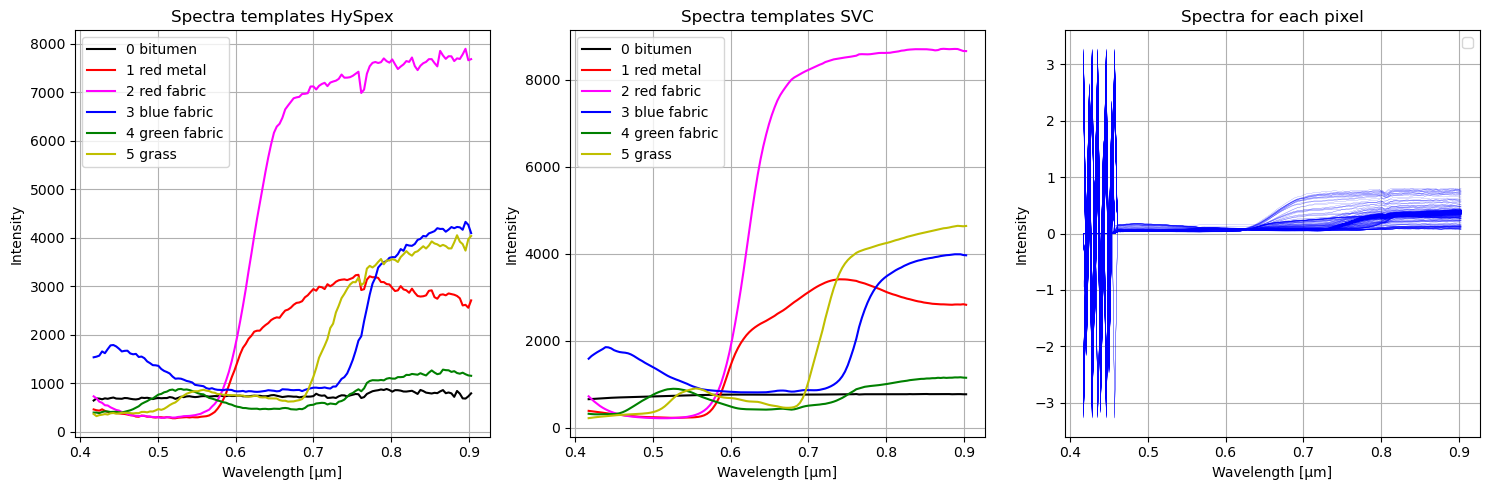

In [36]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  

# plot HySpex templates
for i, s in enumerate(spec_lib_hs.T):
    ax1.plot(wavelengths_hs, s, label=f'{i} {spec_names_hs[i]}', color=spec_colors_hs[i])
ax1.legend()
ax1.set_xlabel('Wavelength [μm]')
ax1.set_ylabel('Intensity')
ax1.set_title('Spectra templates HySpex')
ax1.grid(True)

# plot SVC templates
for i, s in enumerate(spec_lib_svc.T):
    ax2.plot(wavelengths_svc, s, label=f'{i} {spec_names_svc[i]}', color=spec_colors_svc[i])
ax2.legend()
ax2.set_xlabel('Wavelength [μm]')
ax2.set_ylabel('Intensity')
ax2.set_title('Spectra templates SVC')
ax2.grid(True)

# plot spectra
spec_img_use = spec_img[:,:,:]
spec_flat = spec_img_use.reshape(-1, spec_img_use.shape[2])
print(spec_flat.shape)
for i, s in enumerate(spec_flat):
    ax3.plot(band_centers[:], s, color='blue', lw=0.1)
ax3.legend()
ax3.set_xlabel('Wavelength [μm]')
ax3.set_ylabel('Intensity')
ax3.grid(True)
ax3.set_title('Spectra for each pixel')

plt.tight_layout()
plt.show()

## Plot images for several bands

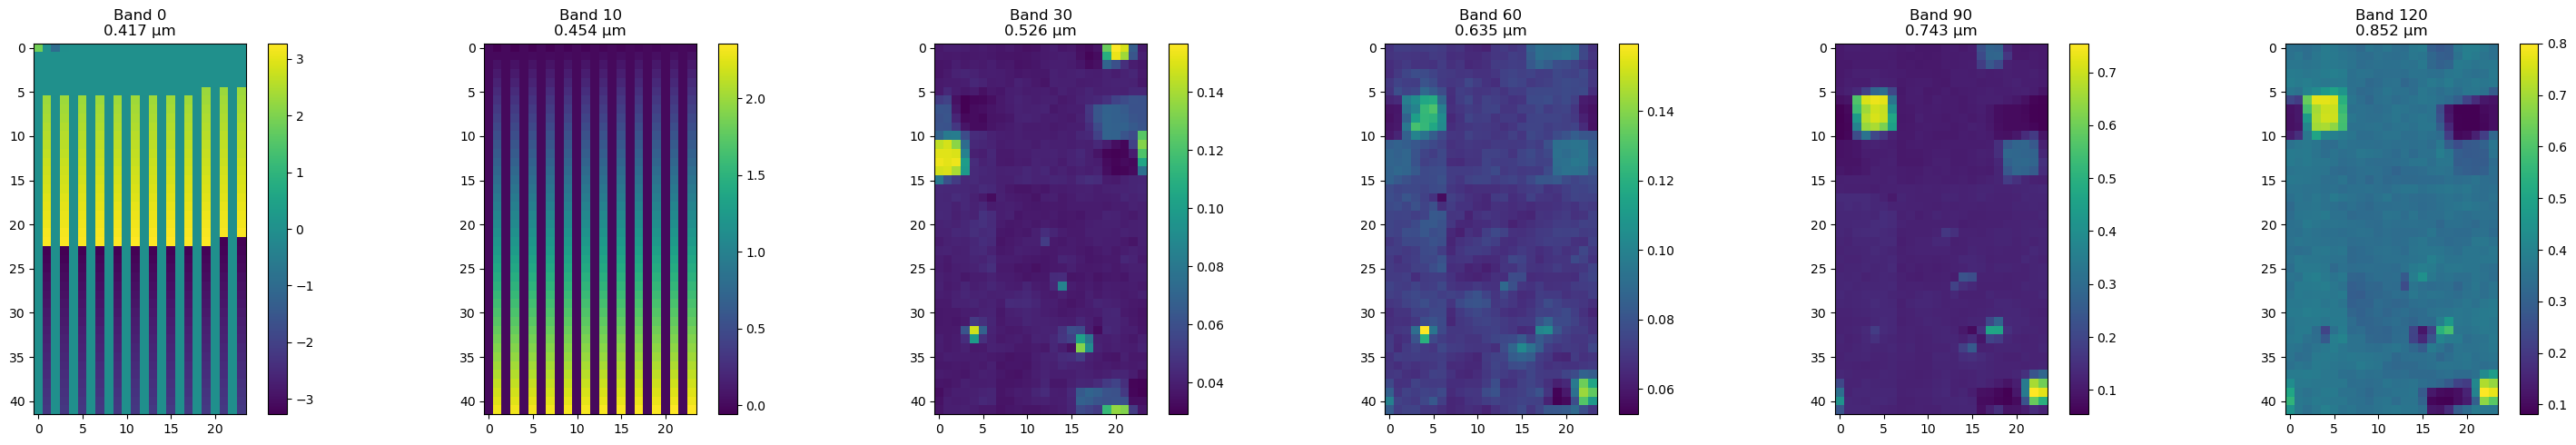

In [38]:
# Define bands to show
bands_ids = [0, 10, 30, 60, 90, 120] # Sample bands across the spectrum
N = len(bands_ids)

# Create figure with N subplots in a row
fig, axes = plt.subplots(1, N, figsize=(5*N, 5))

# Plot each band
for i, band_idx in enumerate(bands_ids):
    im = axes[i].imshow(spec_img[:,:,band_idx])
    axes[i].set_title(f'Band {band_idx}\n{band_centers[band_idx]:.3f} μm')
    plt.colorbar(im, ax=axes[i])
    
plt.tight_layout()
plt.show()

